In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.simulate_markov import simulate_ar1_process
from concurrent.futures import ProcessPoolExecutor
from itertools import repeat

In [36]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [52]:
# Fix the random seed for reproducibility 
random_seed = 100
np.random.seed(random_seed)

The following simulation generates two independent and identically distributed $AR(1)$ processes ($Y_t$ and $Z_t$), plots both processes and calculates the maximum cumulative difference between the two processes until a given time, that is, an approximation of $||Y_t-Z_t||_{\infty}$.



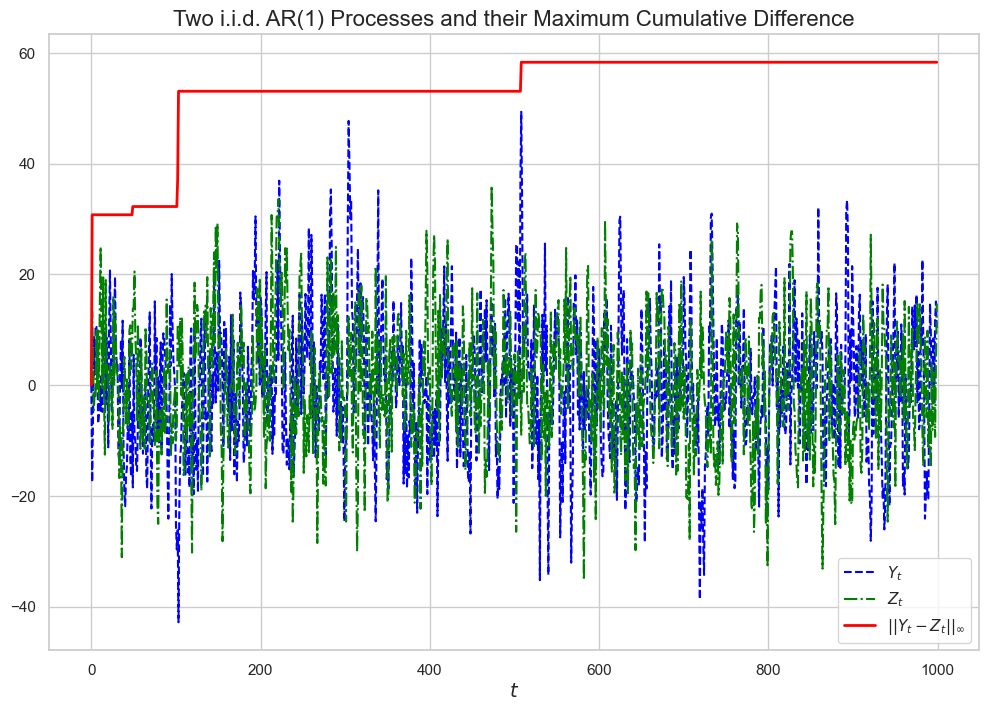

In [56]:
# Set the parameters for the AR(1) process
phi = 0.5
sigma = 10  # Standard deviation of the noise
n_steps = 10**3  # Number of points to simulate

# Set a common initial value for both processes
common_initial_value = 0

processes = simulate_ar1_process(n_steps, phi, sigma, common_initial_value, 2, seed=random_seed)
Y = processes[0]
Z = processes[1]

# Calculate the absolute differences and the cumulative maximum difference
abs_diff = np.abs(Y - Z)
max_diff_cumulative = np.maximum.accumulate(abs_diff)

# Plotting with high contrast colors and LaTeX labels
plt.figure(figsize=(12, 8))
plt.plot(Y, label=r'$Y_t$', linestyle='--', color='blue')
plt.plot(Z, label=r'$Z_t$', linestyle='-.', color='green')
plt.plot(max_diff_cumulative, label=r'$||Y_t-Z_t||_{\infty}$', color='red', linewidth=2)
plt.xlabel(r'$t$', fontsize=14)
plt.title('Two i.i.d. AR(1) Processes and their Maximum Cumulative Difference', fontsize=16)
plt.legend(loc='lower right')
plt.show()


In order to estimate the behaviour of $||Y_t-Z_t||_{\infty}$, we will generate $n=10^3$ simulations of the previous experiment and calculate the maximum difference for each simulation. With this, we will calculate the average and the minimum of the maximum difference for each time step.



In [39]:
n_simulations = 10**3
n_steps = 10**5  # Increasing the number of points to simulate to get a better understanding of the behavior when n is large

In [40]:
# Run simulations in parallel
with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulate_ar1_process, 
                                repeat(n_steps, n_simulations),
                                repeat(phi, n_simulations),
                                repeat(sigma, n_simulations),
                                repeat(common_initial_value, n_simulations),
                                repeat(2, n_simulations),
                                np.random.randint(0, 2**32, n_simulations)))


In [41]:
max_diffs_all_simulations = np.zeros((n_simulations, n_steps))
for sim in range(n_simulations):
    Y, Z = results[sim]
    max_diffs_all_simulations[sim, :] = np.maximum.accumulate(np.abs(Y - Z))
# Calculate the expected maximum difference at each time step
expected_max_diffs = np.mean(max_diffs_all_simulations, axis=0)
min_max_diffs=np.min(max_diffs_all_simulations, axis=0)

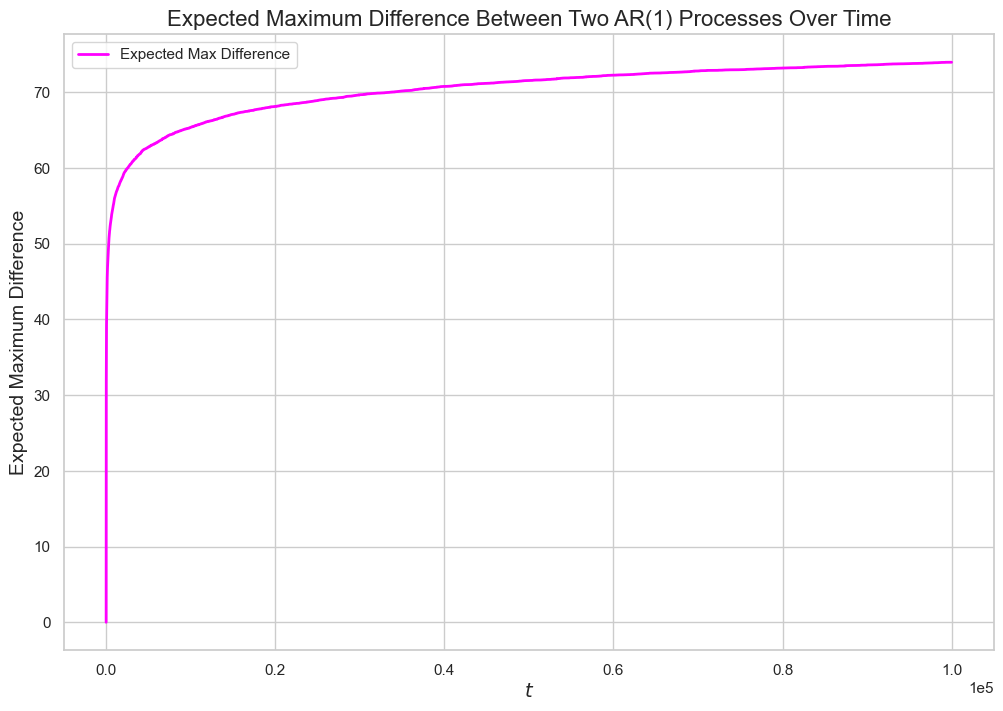

In [57]:
# Plotting the expected maximum difference
plt.figure(figsize=(12, 8))
plt.plot(expected_max_diffs, label='Expected Max Difference', color='magenta', linewidth=2)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel('Expected Maximum Difference', fontsize=14)
plt.title('Expected Maximum Difference Between Two AR(1) Processes Over Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()